<a href="https://colab.research.google.com/github/murali22chan/CS-539-ML-Assignment-1-Part-2-/blob/main/ML_Assignment_1_Part_2_(Credit_Card).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [99]:
col_names = ["Name","Debt","Income","Married?","Owns_Property","Gender","Risk"]

In [100]:
df = pd.read_csv("creditCardData.csv")

In [101]:
df.head()

,Name,Debt,Income,Married?,Owns_Property,Gender,Risk
0,Tim,low,low,no,no,male,low
1,Joe,high,high,yes,yes,male,low
2,Sue,low,high,yes,no,female,low
3,John,medium,low,no,no,male,high
4,Mary,high,low,yes,no,female,high


In [102]:
features = ["Debt","Income","Married?","Owns_Property","Gender"]

X = df[features]
Y= df[['Risk']]

In [103]:
Y


,Risk
0,low
1,low
2,low
3,high
4,high
5,high
6,low
7,low
8,low


In [104]:
X

,Debt,Income,Married?,Owns_Property,Gender
0,low,low,no,no,male
1,high,high,yes,yes,male
2,low,high,yes,no,female
3,medium,low,no,no,male
4,high,low,yes,no,female
5,low,low,yes,no,male
6,low,medium,no,yes,male
7,high,medium,yes,yes,male
8,medium,low,no,no,female


In [105]:
X[["Debt"]]

,Debt
0,low
1,high
2,low
3,medium
4,high
5,low
6,low
7,high
8,medium


In [106]:
clf = DecisionTreeClassifier(criterion= "entropy")

#One Hot Encoding


In [120]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [122]:
ohe.fit(X)
X_train_ohe = ohe.transform(X).toarray()

ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X.columns))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [123]:
ohe_df

,Debt_high,Debt_low,Debt_medium,Income_high,Income_low,Income_medium,Married?_no,Married?_yes,Owns_Property_no,Owns_Property_yes,Gender_female,Gender_male
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
8,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [124]:
X_train_ohe

array([[0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.]])

In [125]:
clf = clf.fit(X_train_ohe, Y)

[Text(0.2857142857142857, 0.9, 'X[4] <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.14285714285714285, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.42857142857142855, 0.7, 'X[6] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2857142857142857, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5714285714285714, 0.5, 'X[11] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.42857142857142855, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7142857142857143, 0.3, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8571428571428571, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

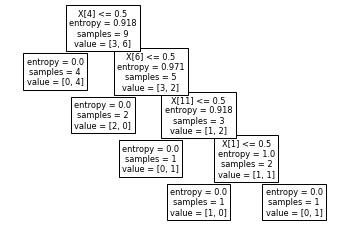

In [126]:
from sklearn import tree
tree.plot_tree(clf)

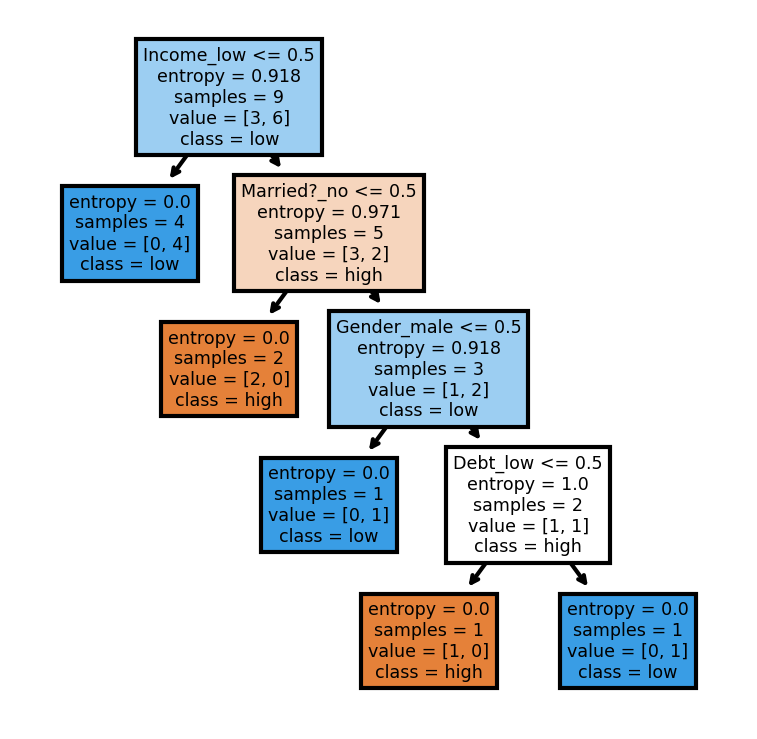

In [127]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(Y).astype('str'),
               filled = True)
plt.show()